# TF-IDF

In [1]:
# Importing the NumPy library for numerical computing
import numpy as np

# Importing the Pandas library for data manipulation and analysis
import pandas as pd

# Importing the Matplotlib library (specifically the pyplot module) for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Importing the Seaborn library, which provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns


In [14]:
# Using pandas to read a tab-separated values (TSV) file into a DataFrame.
# 'abcnews-date-text.tsv' is the file being read, and the data in it is assumed to be tab-delimited.
df = pd.read_csv('abcnews-date-text.tsv', delimiter='\t')


In [15]:
# Join all the values from the 'headline_text' column in the DataFrame into a single string.
# 'df['headline_text'].values' extracts the headline text column as a NumPy array, and ' '.join() combines all the array elements into a single string, separated by spaces.
s = ' '.join(df['headline_text'].values)

# Split the combined string 's' into individual words using the default space separator,
# then convert the resulting list of words into a set to remove any duplicates.
# The set is then converted back into a list, which will contain all unique words from the headlines.
all_words = list(set(s.split()))


In [16]:
word = 'facebook'

In [17]:
# Initialize two empty lists to store words from headlines: 
# One for headlines that contain the specific 'word', and another for those that don't.
all_words_with = []    # This will store words from headlines containing the word.
all_words_without = [] # This will store words from headlines not containing the word.

# Loop through each headline text in the 'headline_text' column of the DataFrame.
for text in df['headline_text'].values:
    # Check if the specific word (assumed to be defined elsewhere in the code) is present in the current headline text.
    if word in text:
        # If the word is found in the headline, split the headline into individual words 
        # and add these words to the 'all_words_with' list.
        all_words_with += text.split()
    else:
        # If the word is not found in the headline, split the headline into individual words 
        # and add these words to the 'all_words_without' list.
        all_words_without += text.split()


In [18]:
len(all_words_with), len(all_words_without)

(8485, 8009067)

In [19]:
# Import the Counter class from the collections module.
# Counter is a subclass of dict that counts the occurrences of each element in a list.
from collections import Counter

# Create a Counter object for the words in 'all_words_with'.
# 'c_with' will store the frequency (count) of each word from the headlines that contain the specific word.
c_with = Counter(all_words_with)

# Create a Counter object for the words in 'all_words_without'.
# 'c_without' will store the frequency (count) of each word from the headlines that do not contain the specific word.
c_without = Counter(all_words_without)

# Calculate the total number of words in headlines that contain the specific word.
# 'L_with' stores the length (total word count) of the 'all_words_with' list.
L_with = len(all_words_with)

# Calculate the total number of words in headlines that do not contain the specific word.
# 'L_without' stores the length (total word count) of the 'all_words_without' list.
L_without = len(all_words_without)


In [20]:
# Initialize a small value 'ep' (epsilon) to avoid division by zero or to provide a non-zero probability for missing words.
# This helps prevent errors when a word is not found in the Counter (i.e., it has zero occurrences).
ep = 0.1

# Calculate the relative frequency of each word in 'all_words' for headlines that contain the specific word.
# This list comprehension iterates over each word 'w' in 'all_words' and does the following:
# - 'c_with.get(w, ep)' retrieves the count of the word 'w' from the 'c_with' Counter.
# - If the word 'w' is not found in the 'c_with' Counter, it returns the value 'ep' instead of 0 (default behavior of .get()).
# - The count (or ep) is divided by 'L_with' to compute the frequency of 'w' in headlines containing the word.
# - The result is converted into a NumPy array for efficient computation and storage.
f_with = np.array([c_with.get(w, ep) / L_with for w in all_words])

# Similarly, calculate the relative frequency of each word in 'all_words' for headlines that do not contain the specific word.
# The logic is the same as above, but it uses 'c_without' and 'L_without' to compute the frequencies for words in the other category.
f_without = np.array([c_without.get(w, ep) / L_without for w in all_words])


In [21]:

# Set the aesthetic style of Seaborn plots.
# 'notebook' is a preconfigured style that adjusts the look and feel of plots to be more suitable for use in a Jupyter notebook environment.
# This changes visual elements like font sizes, background color, and spacing for improved readability within notebooks.
sns.set('notebook')

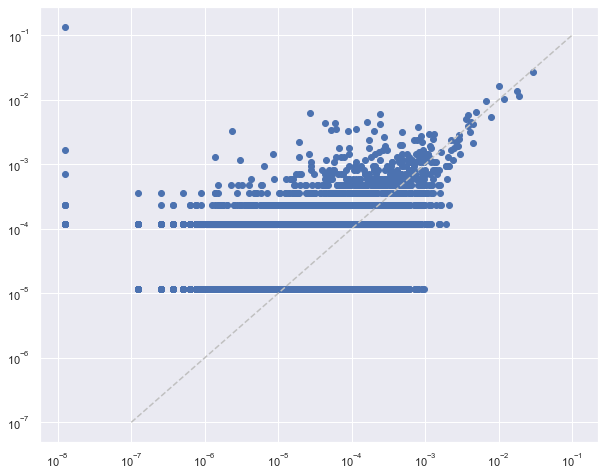

In [22]:
# Create a new figure for the plot with a specific size.
# 'figsize=(10,8)' sets the width to 10 inches and height to 8 inches.
plt.figure(figsize=(10, 8))

# Create a scatter plot comparing the frequencies of words in headlines without the specific word (f_without) 
# to the frequencies of words in headlines with the specific word (f_with).
# Each point in the scatter plot represents a word, with the x-coordinate as its frequency in 'f_without' 
# and the y-coordinate as its frequency in 'f_with'.
plt.scatter(f_without, f_with)

# Create a reference line (dashed) with slope 1 (y=x) to help visualize where the points would lie 
# if the word frequencies were equal in both categories.
# 'r' is an array defining the range for the line, going from 1e-7 to 1e-1 (on both axes).
# '--' makes the line dashed, and 'c="silver"' sets the color of the line to silver.
r = np.array([1e-7, 1e-1])
plt.plot(r, r, '--', c='silver')

# Set the x-axis scale to logarithmic, which is useful for visualizing data that spans several orders of magnitude.
plt.xscale('log')

# Set the y-axis scale to logarithmic as well, for the same reason (handling data with large range differences).
plt.yscale('log')

# Display the plot.
plt.show()


In [23]:
# Calculate the ratio of word frequencies in headlines that contain the specific word ('f_with') 
# to the frequencies in headlines that do not contain the specific word ('f_without').
# This element-wise division produces a ratio for each word, indicating how much more (or less) frequent 
# the word is in headlines containing the specific word compared to those that don't.
ratios = f_with / f_without


In [24]:
# Create an empty DataFrame 'd' using Pandas, which will be used to store word-related data.
d = pd.DataFrame()

# Add a column named 'word' to the DataFrame 'd' and assign it the list of all unique words ('all_words').
# Each row in the 'word' column represents a unique word from the headline text.
d['word'] = all_words

# Add a column named 'tfidf' to the DataFrame 'd' and assign it the values from the 'ratios' array.
# The 'ratios' represent the term frequency-inverse document frequency (TF-IDF) style score, 
# which highlights the relative importance of each word based on its occurrence in headlines with and without the specific word.
# This column links each word to its corresponding TF-IDF ratio.
d['tfidf'] = ratios


In [25]:
#prints the first 5 rows of the df
d.head()

,word,tfidf
0,carters,8.580990
1,components,3.254858
2,captaincies,94.390890
3,sekaleshfar,47.195445
4,jacking,1.241985


In [26]:
# Sort the DataFrame 'd' by the 'tfidf' column in descending order.
# 'sort_values()' is a pandas function that sorts the rows of a DataFrame based on the values in a specific column.
# 'tfidf' is the column being used for sorting, and 'ascending=False' ensures the DataFrame is sorted in descending order,
# so that the words with the highest 'tfidf' ratios appear first.
d = d.sort_values('tfidf', ascending=False)


In [27]:
#prints the first 30 values of the df
d.head(30)

,word,tfidf
36093,facebook,1.071337e+07
74468,facebooks,1.321472e+05
115483,facebook;,5.663453e+04
31417,unfriend,1.887818e+04
114135,unsend,1.887818e+04
100129,winklevoss,1.887818e+04
59872,moderators,1.887818e+04
17899,six4three,9.439089e+03
41041,koobface,9.439089e+03
7363,flopping;,9.439089e+03
